In [9]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d74b51217cc433eaec563878a521387faa55760fbfebd6f14dc7b98820a5e983
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


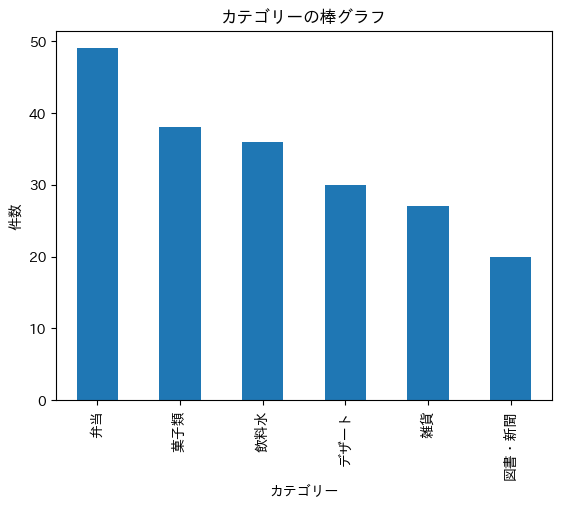

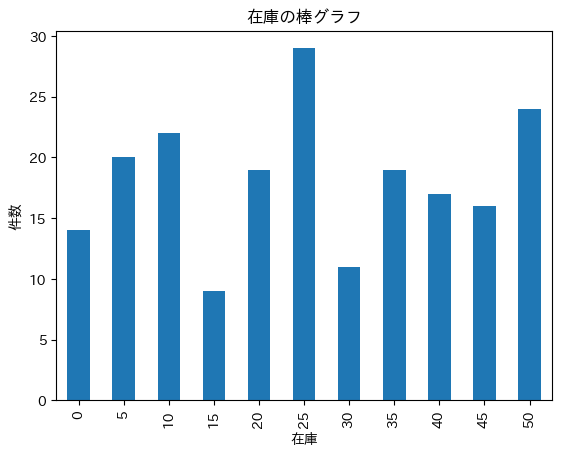

,count,mean,std,min,25%,50%,75%,max
カテゴリー,,,,,,,,
デザート,30.0,26.833333,16.053968,0.0,10.0,30.0,40.00,50.0
図書・新聞,20.0,21.500000,12.680279,0.0,15.0,22.5,25.00,50.0
弁当,49.0,26.836735,16.542051,0.0,10.0,25.0,40.00,50.0
菓子類,38.0,27.763158,16.672415,0.0,10.0,27.5,40.00,50.0
雑貨,27.0,26.851852,17.821128,0.0,10.0,20.0,45.00,50.0
飲料水,36.0,22.916667,14.361407,0.0,10.0,25.0,31.25,50.0


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

df = pd.read_csv("/content/sample_pandas_6.csv")
category_df = pd.read_csv("/content/category.csv")

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

# カテゴリデータの列名（仮定）
categorical_columns = ['カテゴリー', '在庫']  # カテゴリデータの列名を仮定

# カテゴリデータの棒グラフ表示
for column in categorical_columns:
    plt.figure()
    if column == '在庫':
      df[column].value_counts().sort_index().plot(kind='bar') # 在庫列は数値なのでソートする
    else :
      df[column].value_counts().plot(kind='bar')
    plt.title(f"{column}の棒グラフ")
    plt.xlabel(column)
    plt.ylabel("件数")
    plt.show()

# カテゴリーごとの在庫数の基本統計量
df.groupby('カテゴリー')['在庫'].describe()